In [58]:
# Importing requests to extract content from a url
import requests
# Beautifulsoup is for web scrapping...used to scrap specific content
from bs4 import BeautifulSoup as bs  
import re 



In [59]:
iphone_snapdeal=[]
url1= "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/988871559/reviews?page="
url2= "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"

for i in range(1,10):
    ip= []  
    base_url= url1+str(i)+url2
    response= requests.get(base_url)
    soup= bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
    temp= soup.findAll("div",attrs={"class","user-review"})# Extracting the content under specific tags  
    for j in range(len(temp)):
        ip.append(temp[j].find("p").text)
        iphone_snapdeal= iphone_snapdeal+ip
        

In [60]:
### Removing repeated reviews 
iphone_snapdeal = list(set(iphone_snapdeal))

In [61]:
# Writing reviews into text file 
with open("ip_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(iphone_snapdeal))

In [62]:
iphone_snapdeal

['lovely  fastest super',
 'They have sold this Iphone on interest free emi scheme. Even though the phone was available from other sellers at a cheaper price. But no interest part has been credited to my account till now. Snapdeal hasnt taken any action on this issue. Dont buy on fraudulent schemes.',
 'Good Mobile but its memory will be filled faster its just 8GB limit',
 'Good phone',
 "Ordered for my sister's rakhi gift 1 week prior . however it came faster than that..\nand thanks for getting offer from recharge site.\n\ngreat job team.",
 'Its an awesome phone',
 'Very good service by seller. Faster delivery and proper packing.',
 'Good , product is satisfied which I got from Snapdeal',
 'I am very very happy with this iPhone .when I was ordering this phone I had little doubt about that. But after receiving this phone I am really very happy.also found original I iPhone.earlier I had doubted',
 'Good budgeted iphone. Should only go for it if want to have an iphone experience but wit

# Importing Libraries


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.tokenize import TweetTokenizer
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
#!pip install textblob

     -------------------------------------- 636.8/636.8 kB 1.8 MB/s eta 0:00:00


# Importing Data

In [10]:
ip_snapd= pd.read_csv('ip_snapdeal.txt',encoding='Latin-1')
ip_snapd

,['lovely fastest super','They have sold this Iphone on interest free emi scheme. Even though the phone was available from other sellers at a cheaper price. But no interest part has been credited to my account till now. Snapdeal hasnt taken any action on this issue. Dont buy on fraudulent schemes.','Good Mobile but its memory will be filled faster its just 8GB limit','Good phone',"""Ordered for my sister's rakhi gift 1 week prior . however it came faster than that..\nand thanks for getting offer from recharge site.\n\ngreat job team.""",'Its an awesome phone','Very good service by seller. Faster delivery and proper packing.','Good,product is satisfied which I got from Snapdeal','I am very very happy with this iPhone .when I was ordering this phone I had little doubt about that. But after receiving this phone I am really very happy.also found original I iPhone.earlier I had doubted',...,'The 5C was delivered in a sealed box - crisp and brand new ! super deal.','The product supplied by Snapdeal is very good at best price. It is as shown','Worth buying from snap deal due to its competitive price and good service\nThanks sd for the phone at this price',"""The OS will take around 5GB","leaving only 3 GB for your files. Unless you're not a heavy files user.""",'Price and delivery service are good I received my order on time',"""D phone is good. IOS is d best OS.... Safe also. D phone looks great though it consists plastic body. Metal body looks good bt dt nt means plastic body looks cheap plastic may also b nice in looks. Its camera is superb. Battery also. Dere is only one problem nd dat is space... Bt I can't say dis is d phone's problem at all. I hv chosen d 8gb phone so it's my flaw. But in 1 word i just can say it is d best phone in dis price. Thumbs up APPLE""",'Good Product,Do not hang. Samsung products are pathetic. Used Grand Qauttro which use to take 20-30 seconds to open even contact list.\n\nApple is quality product. Only problem is you need to pay for everything.','goood.. fast shipping']


In [11]:
ip_snapd= ' '.join(ip_snapd)
ip_snapd

'[\'lovely  fastest super\'  \'They have sold this Iphone on interest free emi scheme. Even though the phone was available from other sellers at a cheaper price. But no interest part has been credited to my account till now. Snapdeal hasnt taken any action on this issue. Dont buy on fraudulent schemes.\'  \'Good Mobile but its memory will be filled faster its just 8GB limit\'  \'Good phone\'  "Ordered for my sister\'s rakhi gift 1 week prior . however it came faster than that..\\nand thanks for getting offer from recharge site.\\n\\ngreat job team."  \'Its an awesome phone\'  \'Very good service by seller. Faster delivery and proper packing.\'  \'Good   product is satisfied which I got from Snapdeal\'  \'I am very very happy with this iPhone .when I was ordering this phone I had little doubt about that. But after receiving this phone I am really very happy.also found original I iPhone.earlier I had doubted\'  \'Good budgeted iphone. Should only go for it if want to have an iphone exper

In [12]:
# Remove Punctuations 
no_punc_text= ip_snapd.translate(str.maketrans('','',string.punctuation))
no_punc_text

'lovely  fastest super  They have sold this Iphone on interest free emi scheme Even though the phone was available from other sellers at a cheaper price But no interest part has been credited to my account till now Snapdeal hasnt taken any action on this issue Dont buy on fraudulent schemes  Good Mobile but its memory will be filled faster its just 8GB limit  Good phone  Ordered for my sisters rakhi gift 1 week prior  however it came faster than thatnand thanks for getting offer from recharge sitenngreat job team  Its an awesome phone  Very good service by seller Faster delivery and proper packing  Good   product is satisfied which I got from Snapdeal  I am very very happy with this iPhone when I was ordering this phone I had little doubt about that But after receiving this phone I am really very happyalso found original I iPhoneearlier I had doubted  Good budgeted iphone Should only go for it if want to have an iphone experience but within your budget  its nice to deal with Snapdeal g

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anike\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
# remove https or url within text
no_url_text= re.sub(r'http\S+', '', no_punc_text)
no_url_text

'lovely  fastest super  They have sold this Iphone on interest free emi scheme Even though the phone was available from other sellers at a cheaper price But no interest part has been credited to my account till now Snapdeal hasnt taken any action on this issue Dont buy on fraudulent schemes  Good Mobile but its memory will be filled faster its just 8GB limit  Good phone  Ordered for my sisters rakhi gift 1 week prior  however it came faster than thatnand thanks for getting offer from recharge sitenngreat job team  Its an awesome phone  Very good service by seller Faster delivery and proper packing  Good   product is satisfied which I got from Snapdeal  I am very very happy with this iPhone when I was ordering this phone I had little doubt about that But after receiving this phone I am really very happyalso found original I iPhoneearlier I had doubted  Good budgeted iphone Should only go for it if want to have an iphone experience but within your budget  its nice to deal with Snapdeal g

In [15]:
text_tokens= word_tokenize(no_url_text)
print(text_tokens)

['lovely', 'fastest', 'super', 'They', 'have', 'sold', 'this', 'Iphone', 'on', 'interest', 'free', 'emi', 'scheme', 'Even', 'though', 'the', 'phone', 'was', 'available', 'from', 'other', 'sellers', 'at', 'a', 'cheaper', 'price', 'But', 'no', 'interest', 'part', 'has', 'been', 'credited', 'to', 'my', 'account', 'till', 'now', 'Snapdeal', 'hasnt', 'taken', 'any', 'action', 'on', 'this', 'issue', 'Dont', 'buy', 'on', 'fraudulent', 'schemes', 'Good', 'Mobile', 'but', 'its', 'memory', 'will', 'be', 'filled', 'faster', 'its', 'just', '8GB', 'limit', 'Good', 'phone', 'Ordered', 'for', 'my', 'sisters', 'rakhi', 'gift', '1', 'week', 'prior', 'however', 'it', 'came', 'faster', 'than', 'thatnand', 'thanks', 'for', 'getting', 'offer', 'from', 'recharge', 'sitenngreat', 'job', 'team', 'Its', 'an', 'awesome', 'phone', 'Very', 'good', 'service', 'by', 'seller', 'Faster', 'delivery', 'and', 'proper', 'packing', 'Good', 'product', 'is', 'satisfied', 'which', 'I', 'got', 'from', 'Snapdeal', 'I', 'am', '

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anike\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# Tokens count
len(text_tokens)

1573

In [18]:
# Remove Stopwords
my_stop_words= stopwords.words('english')

sw_list= ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens= [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['lovely', 'fastest', 'super', 'They', 'sold', 'Iphone', 'interest', 'free', 'emi', 'scheme', 'Even', 'though', 'phone', 'available', 'sellers', 'cheaper', 'price', 'But', 'interest', 'part', 'credited', 'account', 'till', 'Snapdeal', 'hasnt', 'taken', 'action', 'issue', 'Dont', 'buy', 'fraudulent', 'schemes', 'Good', 'Mobile', 'memory', 'filled', 'faster', '8GB', 'limit', 'Good', 'phone', 'Ordered', 'sisters', 'rakhi', 'gift', '1', 'week', 'prior', 'however', 'came', 'faster', 'thatnand', 'thanks', 'getting', 'offer', 'recharge', 'sitenngreat', 'job', 'team', 'Its', 'awesome', 'phone', 'Very', 'good', 'service', 'seller', 'Faster', 'delivery', 'proper', 'packing', 'Good', 'product', 'satisfied', 'got', 'Snapdeal', 'happy', 'iPhone', 'ordering', 'phone', 'little', 'doubt', 'But', 'receiving', 'phone', 'really', 'happyalso', 'found', 'original', 'iPhoneearlier', 'doubted', 'Good', 'budgeted', 'iphone', 'Should', 'go', 'want', 'iphone', 'experience', 'within', 'budget', 'nice', 'deal', '

In [19]:
# Normalize the data
lower_words= [Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['nice', 'deal', 'snapdeal', 'good', 'shipping', 'service', 'best', 'phone', 'iphone', 'offer', 'product', 'available', 'customer', 'care', 'also', 'good', 'a', 'mush', 'deal', 'good', 'product', 'worth', 'buying', 'nice', 'phone', 'timely', 'delivery', 'snap', 'deal', 'much', 'happy', 'product', 'thanks', 'snepdeal', 'very', 'good', 'phone', 'price', 'category', 'manufacturers', 'warranty', 'awsme', 'delivry', 'time', 'product', 'recievd', 'good', 'condition', 'think', 'awsme', 'site', 'shoping', 'bought', 'iphone', '5c', 'best', 'deal', 'ever', 'product', 'quite', 'good', 'also', 'updated', 'latest', 'ios', 'versionnvery', 'happy', 'deal', 'excellent', 'product', 'can', 'recommended', 'friends', 'family', 'members', 'it', 'nice', 'phone', 'apple', 'camera', 'good', 'phone', 'works', 'perfectly', 'it', 'worth', 'shot', 'this', 'product', 'awwsum', 'use', 'as', 'looks', 'also', 'would', 'defination', 'prefer', 'nxt', 'time', 'also']


In [20]:
# Stemming (Optional)
ps= PorterStemmer()
stemmed_tokens= [ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['nice', 'deal', 'snapdeal', 'good', 'ship', 'servic', 'best', 'phone', 'iphon', 'offer', 'product', 'avail', 'custom', 'care', 'also', 'good', 'a', 'mush', 'deal', 'good', 'product', 'worth', 'buy', 'nice', 'phone', 'time', 'deliveri', 'snap', 'deal', 'much', 'happi', 'product', 'thank', 'snepdeal', 'veri', 'good', 'phone', 'price', 'categori', 'manufactur', 'warranti', 'awsm', 'delivri', 'time', 'product', 'recievd', 'good', 'condit', 'think', 'awsm', 'site', 'shope', 'bought', 'iphon', '5c', 'best', 'deal', 'ever', 'product', 'quit', 'good', 'also', 'updat', 'latest', 'io', 'versionnveri', 'happi', 'deal', 'excel', 'product', 'can', 'recommend', 'friend', 'famili', 'member', 'it', 'nice', 'phone', 'appl', 'camera', 'good', 'phone', 'work', 'perfectli', 'it', 'worth', 'shot', 'thi', 'product', 'awwsum', 'use', 'as', 'look', 'also', 'would', 'defin', 'prefer', 'nxt', 'time', 'also']


In [21]:
# Lemmatization
import spacy
from spacy.lang.en.examples import sentences
nlp= spacy.load('en_core_web_sm')
doc= nlp(' '.join(lower_words))
print(doc)

lovely fastest super they sold iphone interest free emi scheme even though phone available sellers cheaper price but interest part credited account till snapdeal hasnt taken action issue dont buy fraudulent schemes good mobile memory filled faster 8gb limit good phone ordered sisters rakhi gift 1 week prior however came faster thatnand thanks getting offer recharge sitenngreat job team its awesome phone very good service seller faster delivery proper packing good product satisfied got snapdeal happy iphone ordering phone little doubt but receiving phone really happyalso found original iphoneearlier doubted good budgeted iphone should go want iphone experience within budget nice deal snapdeal good shipping service best phone iphone offer product available customer care also good a mush deal good product worth buying nice phone timely delivery snap deal much happy product thanks snepdeal very good phone price category manufacturers warranty awsme delivry time product recievd good conditi

In [22]:
lemmas= [token.lemma_ for token in doc]
print(lemmas)

['lovely', 'fast', 'super', 'they', 'sell', 'iphone', 'interest', 'free', 'emi', 'scheme', 'even', 'though', 'phone', 'available', 'seller', 'cheap', 'price', 'but', 'interest', 'part', 'credit', 'account', 'till', 'snapdeal', 'have', 'not', 'take', 'action', 'issue', 'do', 'not', 'buy', 'fraudulent', 'scheme', 'good', 'mobile', 'memory', 'fill', 'fast', '8', 'gb', 'limit', 'good', 'phone', 'order', 'sister', 'rakhi', 'gift', '1', 'week', 'prior', 'however', 'come', 'fast', 'thatnand', 'thank', 'get', 'offer', 'recharge', 'sitenngreat', 'job', 'team', 'its', 'awesome', 'phone', 'very', 'good', 'service', 'seller', 'fast', 'delivery', 'proper', 'packing', 'good', 'product', 'satisfied', 'get', 'snapdeal', 'happy', 'iphone', 'order', 'phone', 'little', 'doubt', 'but', 'receive', 'phone', 'really', 'happyalso', 'find', 'original', 'iphoneearli', 'doubted', 'good', 'budget', 'iphone', 'should', 'go', 'want', 'iphone', 'experience', 'within', 'budget', 'nice', 'deal', 'snapdeal', 'good', 's

In [23]:
clean_comments= ' '.join(lemmas)
clean_comments

'lovely fast super they sell iphone interest free emi scheme even though phone available seller cheap price but interest part credit account till snapdeal have not take action issue do not buy fraudulent scheme good mobile memory fill fast 8 gb limit good phone order sister rakhi gift 1 week prior however come fast thatnand thank get offer recharge sitenngreat job team its awesome phone very good service seller fast delivery proper packing good product satisfied get snapdeal happy iphone order phone little doubt but receive phone really happyalso find original iphoneearli doubted good budget iphone should go want iphone experience within budget nice deal snapdeal good shipping service good phone iphone offer product available customer care also good a mush deal good product worth buy nice phone timely delivery snap deal much happy product thank snepdeal very good phone price category manufacturer warranty awsme delivry time product recievd good condition think awsme site shop buy iphon

In [24]:
# feature extraction
cv= CountVectorizer()
clean_commentscv= cv.fit_transform(lemmas)

In [25]:
print(cv.vocabulary_)

{'lovely': 193, 'fast': 124, 'super': 345, 'they': 358, 'sell': 308, 'iphone': 172, 'interest': 168, 'free': 135, 'emi': 113, 'scheme': 304, 'even': 115, 'though': 363, 'phone': 244, 'available': 32, 'seller': 309, 'cheap': 62, 'price': 255, 'but': 53, 'part': 237, 'credit': 83, 'account': 13, 'till': 366, 'snapdeal': 332, 'have': 153, 'not': 222, 'take': 350, 'action': 14, 'issue': 175, 'do': 103, 'buy': 54, 'fraudulent': 134, 'good': 143, 'mobile': 205, 'memory': 202, 'fill': 128, 'gb': 138, 'limit': 188, 'order': 231, 'sister': 325, 'rakhi': 280, 'gift': 141, 'week': 393, 'prior': 257, 'however': 162, 'come': 68, 'thatnand': 355, 'thank': 353, 'get': 140, 'offer': 225, 'recharge': 288, 'sitenngreat': 327, 'job': 180, 'team': 351, 'its': 179, 'awesome': 33, 'very': 390, 'service': 310, 'delivery': 96, 'proper': 270, 'packing': 236, 'product': 263, 'satisfied': 300, 'happy': 151, 'little': 190, 'doubt': 104, 'receive': 286, 'really': 285, 'happyalso': 152, 'find': 129, 'original': 232

In [26]:
print(cv.get_feature_names()[100:200])

['discount', 'dispatchnprosn1', 'display', 'do', 'doubt', 'doubted', 'doubtfull', 'dream', 'dt', 'due', 'earn', 'easy', 'eliveryi', 'emi', 'essy', 'even', 'ever', 'everyone', 'everything', 'excellent', 'expectation', 'experience', 'fake', 'family', 'fast', 'feature', 'feel', 'file', 'fill', 'find', 'finger', 'first', 'five', 'flaw', 'fraudulent', 'free', 'friend', 'fully', 'gb', 'genuine', 'get', 'gift', 'go', 'good', 'goodbut', 'goood', 'grand', 'great', 'guess', 'hahahaha', 'hang', 'happy', 'happyalso', 'have', 'headphone', 'hear', 'heat', 'heavy', 'hesitate', 'honest', 'honestly', 'hour', 'however', 'hv', 'in', 'initially', 'inter', 'interaction', 'interest', 'io', 'ios', 'ios9', 'iphone', 'iphone5c', 'iphoneearli', 'issue', 'it', 'item', 'itnniphone', 'its', 'job', 'lack', 'lag', 'lagging', 'late', 'leave', 'level', 'like', 'limit', 'listnnapple', 'little', 'look', 'love', 'lovely', 'low', 'make', 'manufacturer', 'mark', 'marvallous', 'may']


C:\Users\anike\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
print(clean_commentscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [28]:
print(clean_commentscv.toarray().shape)

(1028, 410)


# n-gram

In [30]:
cv_ngram_range= CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram= cv_ngram_range.fit_transform(lemmas)

In [31]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['100', '5c', 'also', 'amazing', 'and', 'android', 'apple', 'awesome', 'body', 'budget', 'but', 'buy', 'camera', 'can', 'cheap', 'condition', 'day', 'deal', 'deliver', 'delivery', 'do', 'even', 'excellent', 'experience', 'fast', 'feature', 'feel', 'file', 'fill', 'first', 'free', 'gb', 'genuine', 'get', 'go', 'good', 'great', 'happy', 'io', 'iphone', 'issue', 'it', 'its', 'late', 'like', 'look', 'low', 'memory', 'mobile', 'money', 'must', 'need', 'new', 'nice', 'not', 'one', 'order', 'original', 'overall', 'pack', 'perfect', 'perform', 'performance', 'phone', 'plastic', 'price', 'problem', 'product', 'provide', 'quality', 'really', 'receive', 'recommend', 'satisfied', 'seller', 'service', 'shipping', 'shop', 'site', 'snap', 'snapdeal', 'so', 'space', 'superb', 'take', 'thank', 'the', 'this', 'though', 'till', 'time', 'use', 'value', 'very', 'want', 'within', 'worth', 'would', 'year', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0

In [32]:
# tfidf vectorizer
tfidfv_ngram_max_features= TfidfVectorizer(norm= 'l2',analyzer= 'word',ngram_range= (1,3),max_features= 500)
tfidf_matix_ngram= tfidfv_ngram_max_features.fit_transform(lemmas)

# Generate Wordcloud

In [33]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

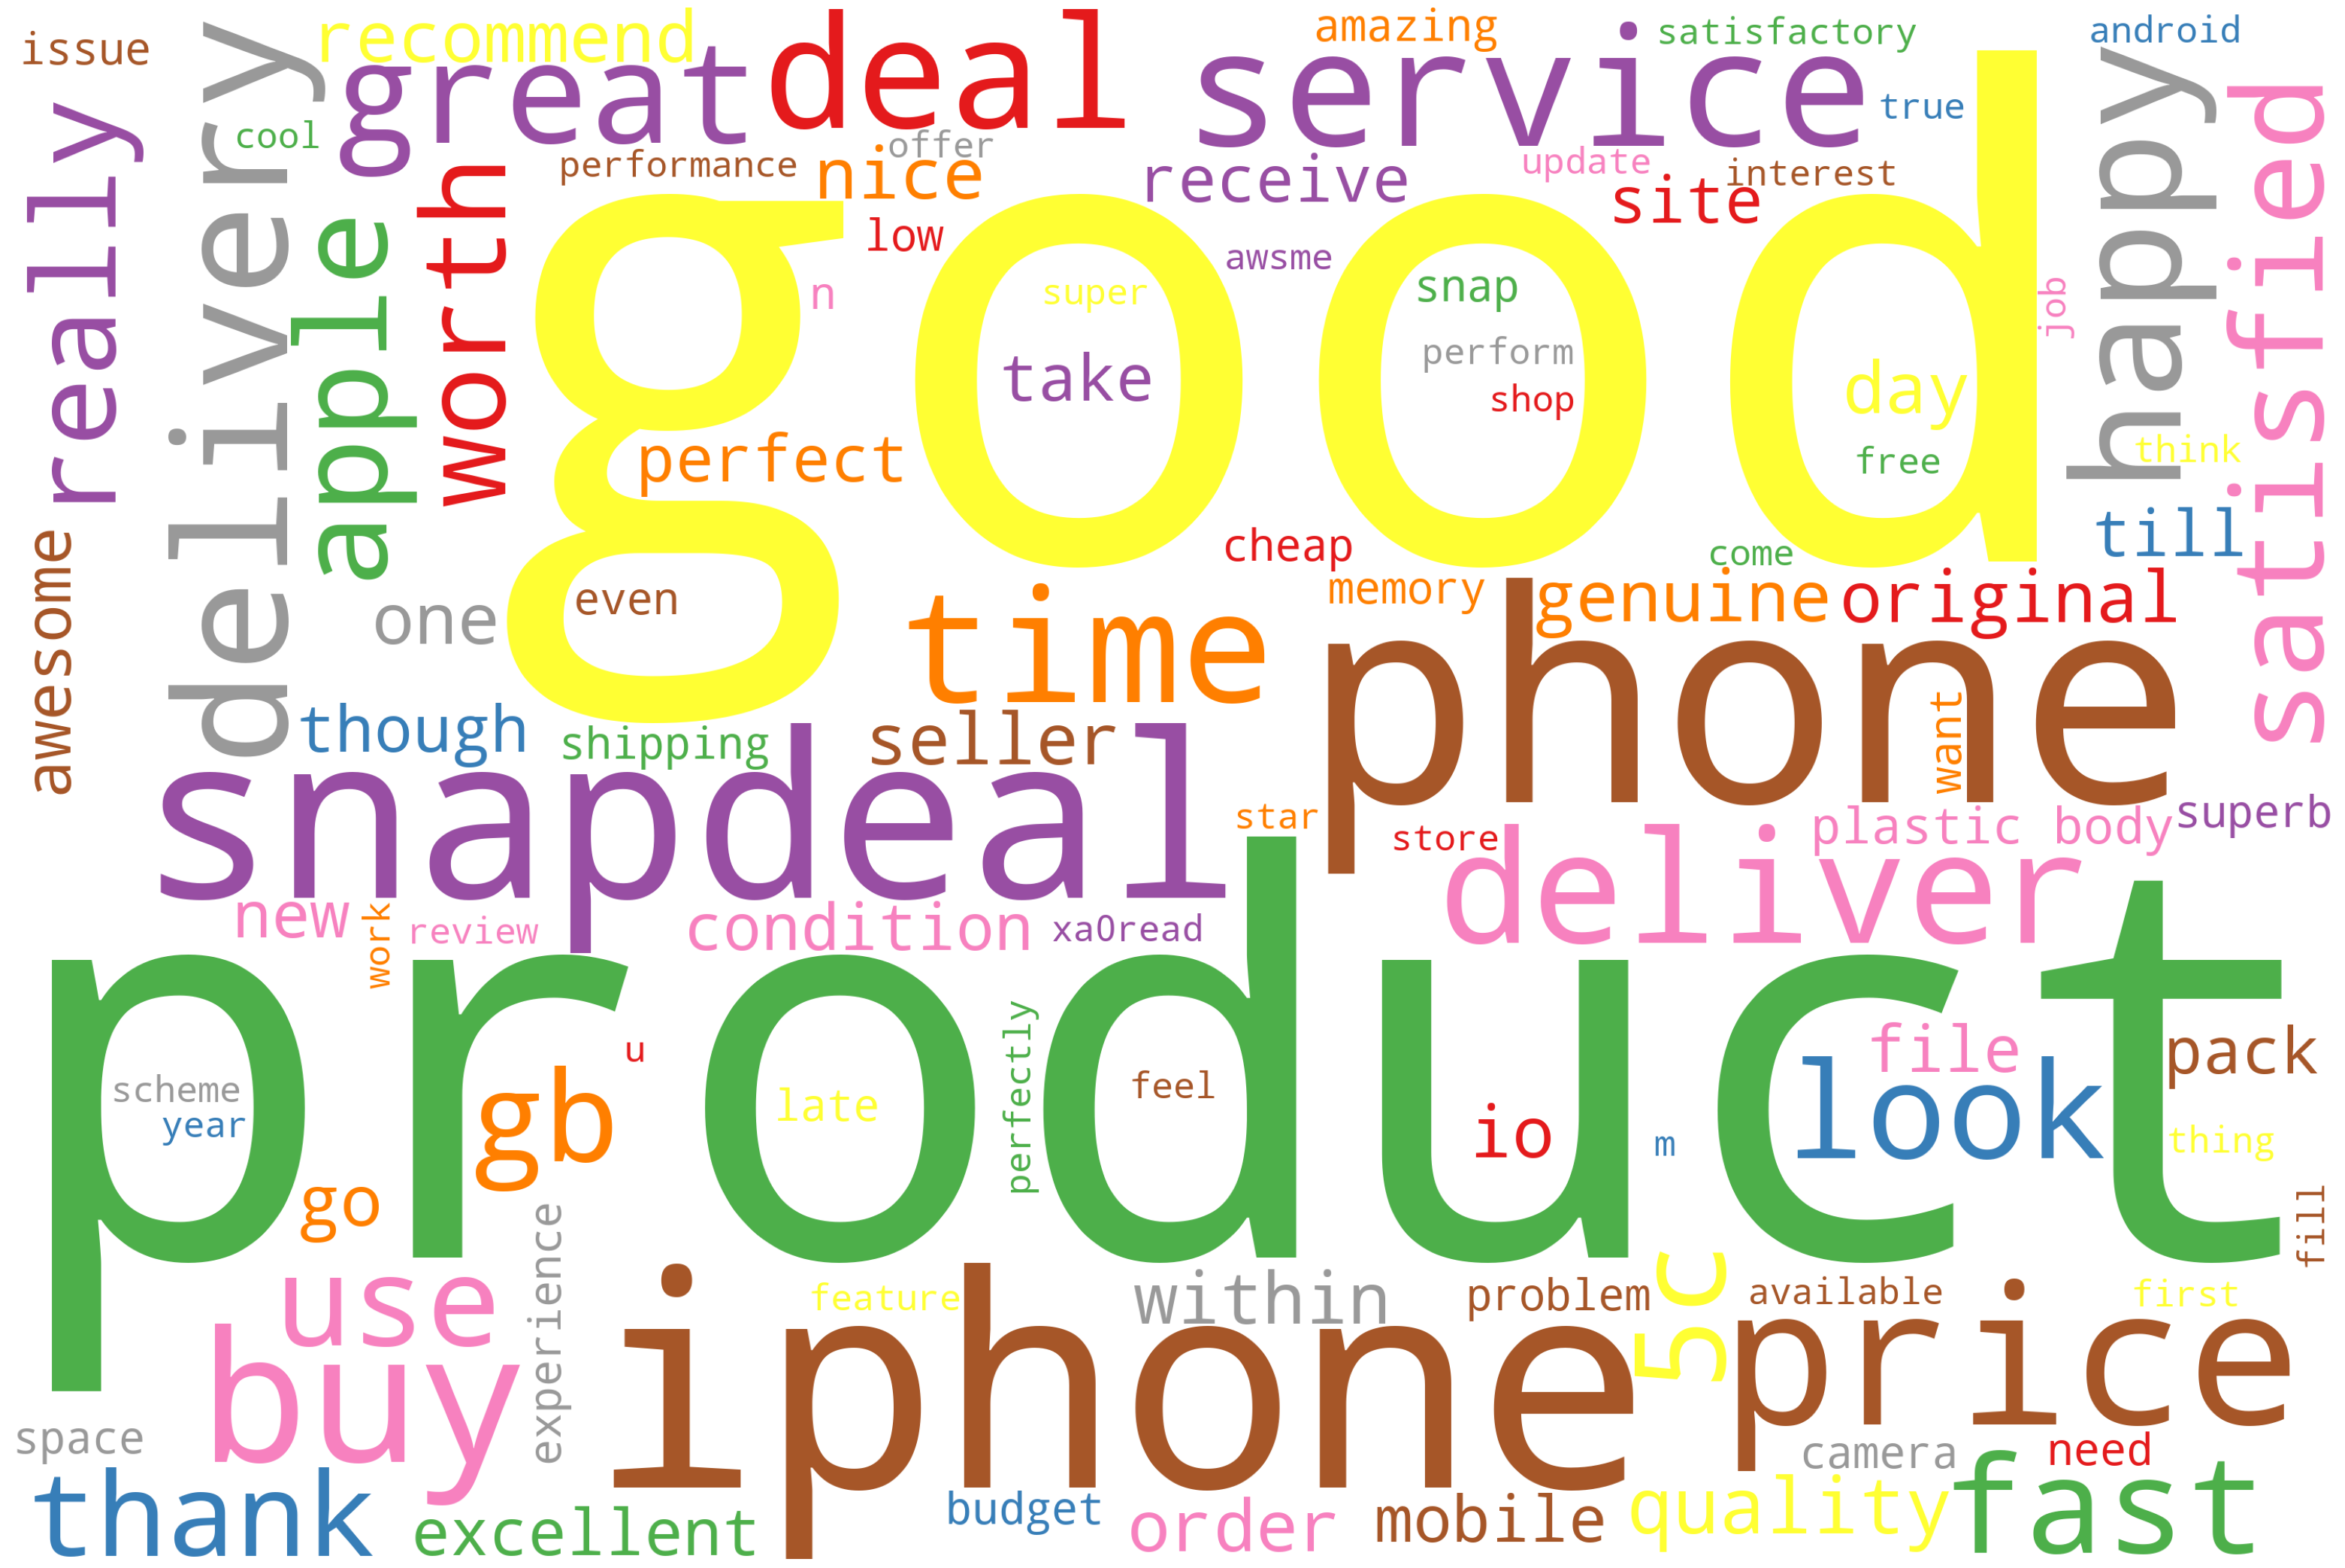

In [34]:
# Generate wordcloud
stopwords= STOPWORDS
stopwords.add('pron')
stopwords.add('rt')
stopwords.add('yeah')
wordcloud= WordCloud(width= 3000, height= 2000, background_color= 'white', max_words= 100,colormap= 'Set1',stopwords=stopwords).generate(clean_comments)
# Plot
plot_cloud(wordcloud)

# Name Entity Recognition 

In [35]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')
one_block= clean_comments
doc_block= nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [36]:
for token in doc_block[100:200]:
    print(token,token.pos_)

experience NOUN
within ADP
budget NOUN
nice ADJ
deal NOUN
snapdeal ADJ
good ADJ
shipping NOUN
service NOUN
good ADJ
phone NOUN
iphone NOUN
offer NOUN
product NOUN
available ADJ
customer NOUN
care NOUN
also ADV
good ADJ
a DET
mush NOUN
deal NOUN
good ADJ
product NOUN
worth ADJ
buy VERB
nice ADJ
phone NOUN
timely ADJ
delivery NOUN
snap NOUN
deal NOUN
much ADV
happy ADJ
product NOUN
thank NOUN
snepdeal NOUN
very ADV
good ADJ
phone NOUN
price NOUN
category NOUN
manufacturer NOUN
warranty NOUN
awsme PROPN
delivry NOUN
time NOUN
product NOUN
recievd VERB
good ADJ
condition NOUN
think VERB
awsme PROPN
site NOUN
shop NOUN
buy VERB
iphone NOUN
5c PROPN
good ADJ
deal NOUN
ever ADV
product NOUN
quite ADV
good ADJ
also ADV
update VERB
late ADJ
ios NOUN
versionnvery PROPN
happy ADJ
deal NOUN
excellent ADJ
product NOUN
can AUX
recommend VERB
friend NOUN
family NOUN
member NOUN
it PRON
nice ADJ
phone NOUN
apple NOUN
camera NOUN
good ADJ
phone NOUN
work NOUN
perfectly ADV
it PRON
worth ADJ
shoot VERB


In [37]:
# Filtering the nouns and verbs only
nouns_verbs= [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['friend', 'family', 'member', 'phone', 'apple', 'camera', 'phone', 'work', 'shoot', 'product', 'awwsum', 'use', 'look', 'defination', 'prefer', 'nxt', 'time', 'hesitate', 'review', 'review', 'damage', 'reputation', 'service', 'product', 'service', 'believe', 'rumour', 'go', 'star', 'thank', 'shopping', 'experience', 'product', 'service', 'snap', 'deal', 'seller', 'deliver', 'phone', 'phone', 'processing', 'memory', 'space', 'total', 'gb', 'space', 'gb', 'fill', 'snapdeal', 'deliver', 'promise', 'time', 'quality', 'product', 'delivery', 'time', 'product', 'priceat', 'buy', 'apple', 'product', 'deal', 'make', 'n', 'order', 'finger', 'feature', 'phone', 'get', 'heat', 'time', 'lack', 'feel', 'buy', 'iphone', 'product', 'wor', 'price', 'shop', 'side', 'phone', 'class', 'service', 'ð\x9f\x98\x98', 'phone', 'mobile', 'oparating', 'work', 'buy', 'price', 'sale', 'month', 'buy', 'product', 'product', 'perform', 'product', 'quality', 'thing', 'memory']


In [38]:
# Counting the noun & verb tokens
cv= CountVectorizer()

X= cv.fit_transform(nouns_verbs)
sum_words= X.sum(axis=0)

words_freq= [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq= sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df= pd.DataFrame(words_freq)
wd_df.columns= ['word','count']
# viewing top ten results
wd_df[0:10]

,word,count
0,product,40
1,phone,28
2,iphone,27
3,price,17
4,buy,15
5,service,12
6,delivery,11
7,deal,11
8,time,11
9,deliver,11


<AxesSubplot:title={'center':'Top 10 nouns and verbs'}, xlabel='word'>

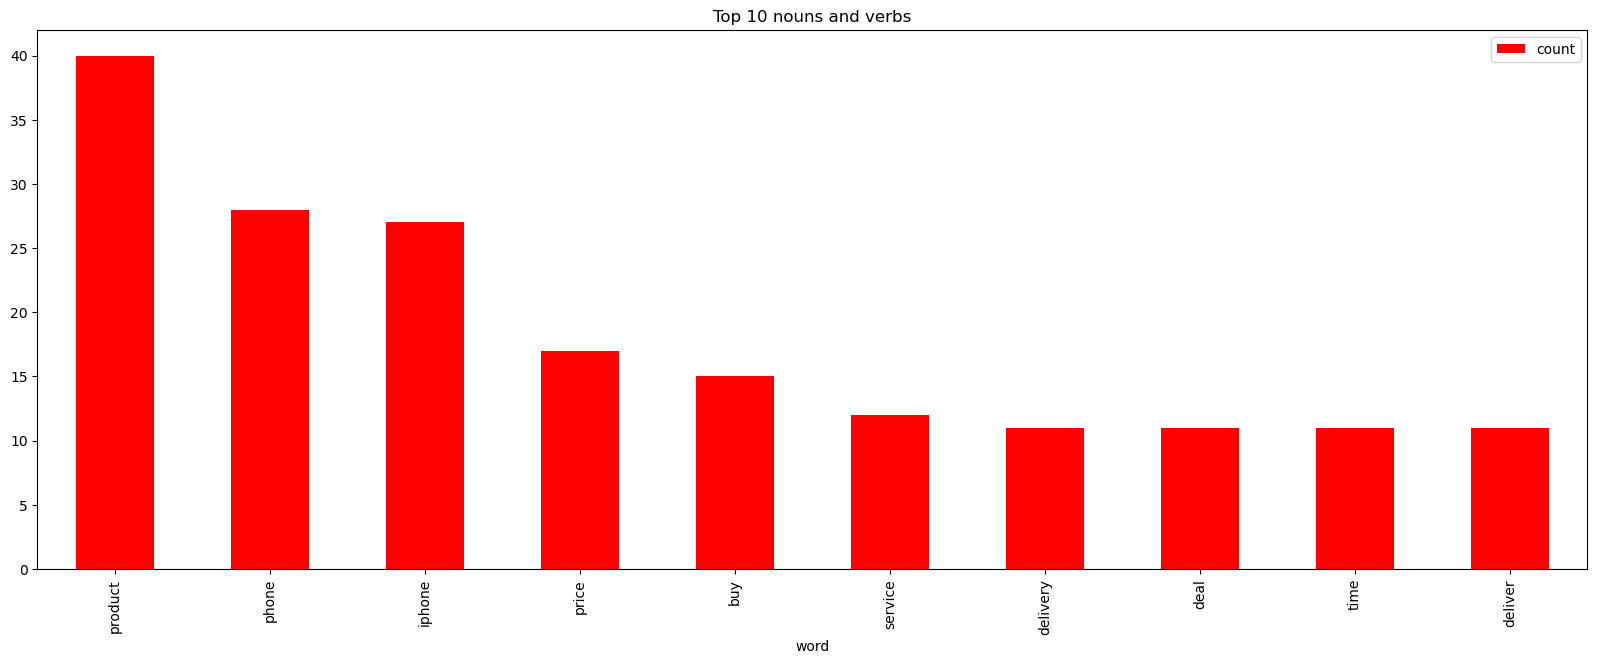

In [39]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word', figsize=(20,7), title='Top 10 nouns and verbs',color='red')

# Emotion Mining Analysis

In [40]:
from nltk import tokenize
sentences= tokenize.sent_tokenize(' '.join(iphone_snapdeal))
sentences

['lovely  fastest super They have sold this Iphone on interest free emi scheme.',
 'Even though the phone was available from other sellers at a cheaper price.',
 'But no interest part has been credited to my account till now.',
 'Snapdeal hasnt taken any action on this issue.',
 'Dont buy on fraudulent schemes.',
 "Good Mobile but its memory will be filled faster its just 8GB limit Good phone Ordered for my sister's rakhi gift 1 week prior .",
 'however it came faster than that..\nand thanks for getting offer from recharge site.',
 'great job team.',
 'Its an awesome phone Very good service by seller.',
 'Faster delivery and proper packing.',
 'Good , product is satisfied which I got from Snapdeal I am very very happy with this iPhone .when I was ordering this phone I had little doubt about that.',
 'But after receiving this phone I am really very happy.also found original I iPhone.earlier I had doubted Good budgeted iphone.',
 'Should only go for it if want to have an iphone experienc

In [41]:
sent_df= pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,lovely fastest super They have sold this Ipho...
1,Even though the phone was available from other...
2,But no interest part has been credited to my a...
3,Snapdeal hasnt taken any action on this issue.
4,Dont buy on fraudulent schemes.
...,...
122,Samsung products are pathetic.
123,Used Grand Qauttro which use to take 20-30 sec...
124,Apple is quality product.
125,Only problem is you need to pay for everything.


In [42]:
# Emotion Lexicon - Affin
affin=pd.read_csv(r"C:\Users\anike\Downloads\Afinn.csv",sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [43]:
affinity_scores= affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [44]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp= spacy.load('en_core_web_sm')
sentiment_lexicon= affinity_scores

def calculate_sentiment(text:str=None):
    sent_score= 0
    if text:
        sentence= nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [45]:
# manual testing
calculate_sentiment(text= 'great')

3

In [46]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']= sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      8
1      0
2      0
3      0
4     -4
      ..
122   -2
123    0
124    0
125   -3
126    0
Name: sentiment_value, Length: 127, dtype: int64

In [47]:
# how many words are there in a sentence?
sent_df['word_count']= sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1      13
2      12
3       8
4       5
       ..
122     4
123    14
124     4
125     9
126     3
Name: word_count, Length: 127, dtype: int64

In [49]:
sent_df.sort_values(by= 'sentiment_value')
sent_df

,sentence,sentiment_value,word_count
0,lovely fastest super They have sold this Ipho...,8,13
1,Even though the phone was available from other...,0,13
2,But no interest part has been credited to my a...,0,12
3,Snapdeal hasnt taken any action on this issue.,0,8
4,Dont buy on fraudulent schemes.,-4,5
...,...,...,...
122,Samsung products are pathetic.,-2,4
123,Used Grand Qauttro which use to take 20-30 sec...,0,14
124,Apple is quality product.,0,4
125,Only problem is you need to pay for everything.,-3,9


In [50]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    127.000000
mean       2.913386
std        4.063042
min       -6.000000
25%        0.000000
50%        2.000000
75%        5.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [51]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
1,Even though the phone was available from other...,0,13
2,But no interest part has been credited to my a...,0,12
3,Snapdeal hasnt taken any action on this issue.,0,8
4,Dont buy on fraudulent schemes.,-4,5
9,Faster delivery and proper packing.,0,5
11,But after receiving this phone I am really ver...,-1,20
26,I would defination prefer this nxt time also H...,-2,20
27,But those all reviews are fake and just to dam...,-6,14
28,I am truely satisfied by snapdeal's service.,0,7
29,100% satisfactory.,0,2


In [52]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,lovely fastest super They have sold this Ipho...,8,13
5,Good Mobile but its memory will be filled fast...,5,25
6,however it came faster than that..\nand thanks...,2,14
7,great job team.,3,3
8,Its an awesome phone Very good service by seller.,7,9
...,...,...,...
113,Safe also.,1,2
114,D phone looks great though it consists plastic...,3,9
115,Metal body looks good bt dt nt means plastic b...,6,19
116,Its camera is superb.,5,4


In [53]:
# Adding index cloumn
sent_df['index']= range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,lovely fastest super They have sold this Ipho...,8,13,0
1,Even though the phone was available from other...,0,13,1
2,But no interest part has been credited to my a...,0,12,2
3,Snapdeal hasnt taken any action on this issue.,0,8,3
4,Dont buy on fraudulent schemes.,-4,5,4
...,...,...,...,...
122,Samsung products are pathetic.,-2,4,122
123,Used Grand Qauttro which use to take 20-30 sec...,0,14,123
124,Apple is quality product.,0,4,124
125,Only problem is you need to pay for everything.,-3,9,125


C:\Users\anike\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

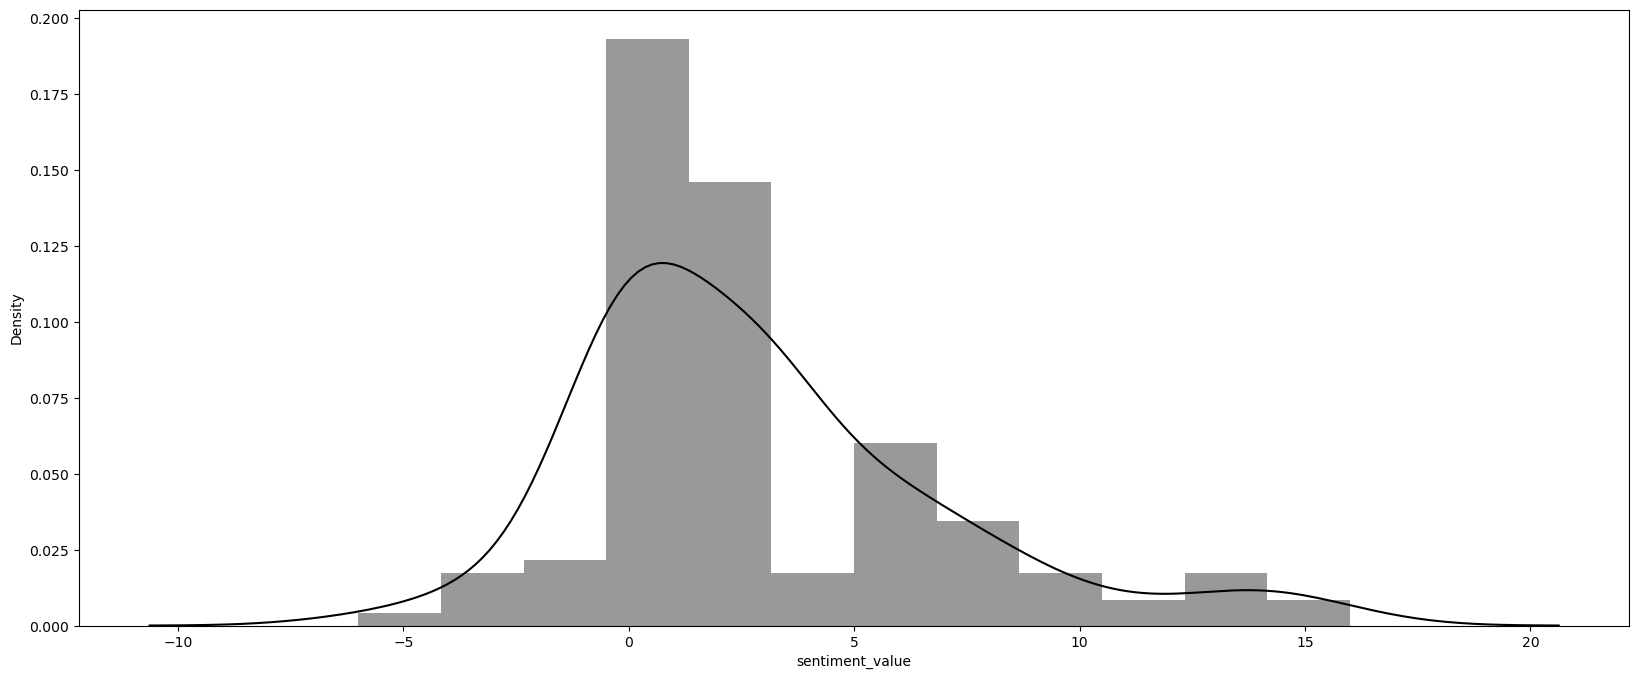

In [54]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize= (20,8))
sns.distplot(sent_df['sentiment_value'],color="black")

In [ ]:
# sentiment value from 0-3 has the highest value of density

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

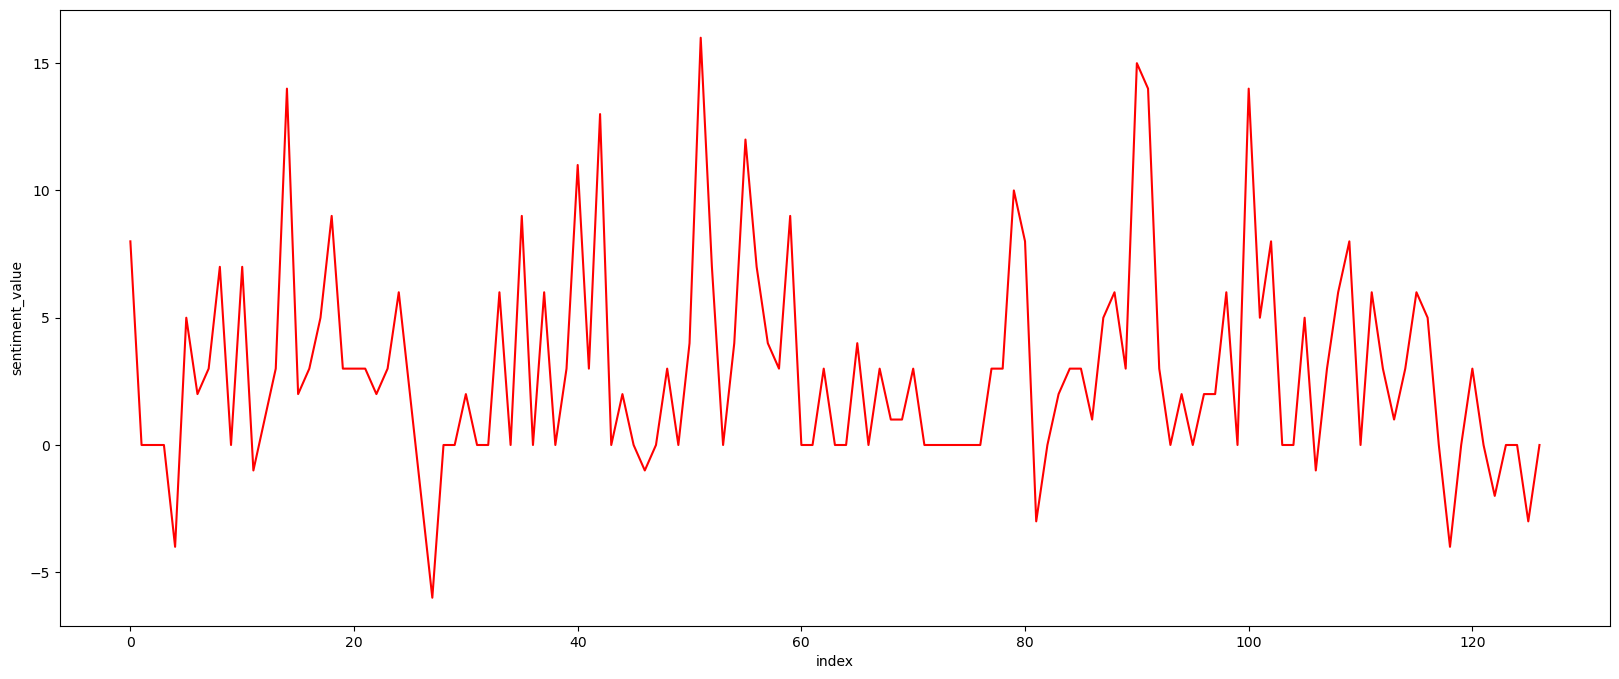

In [55]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize= (20,8))
sns.lineplot(y= 'sentiment_value',x= 'index',data= sent_df,color= 'red')

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

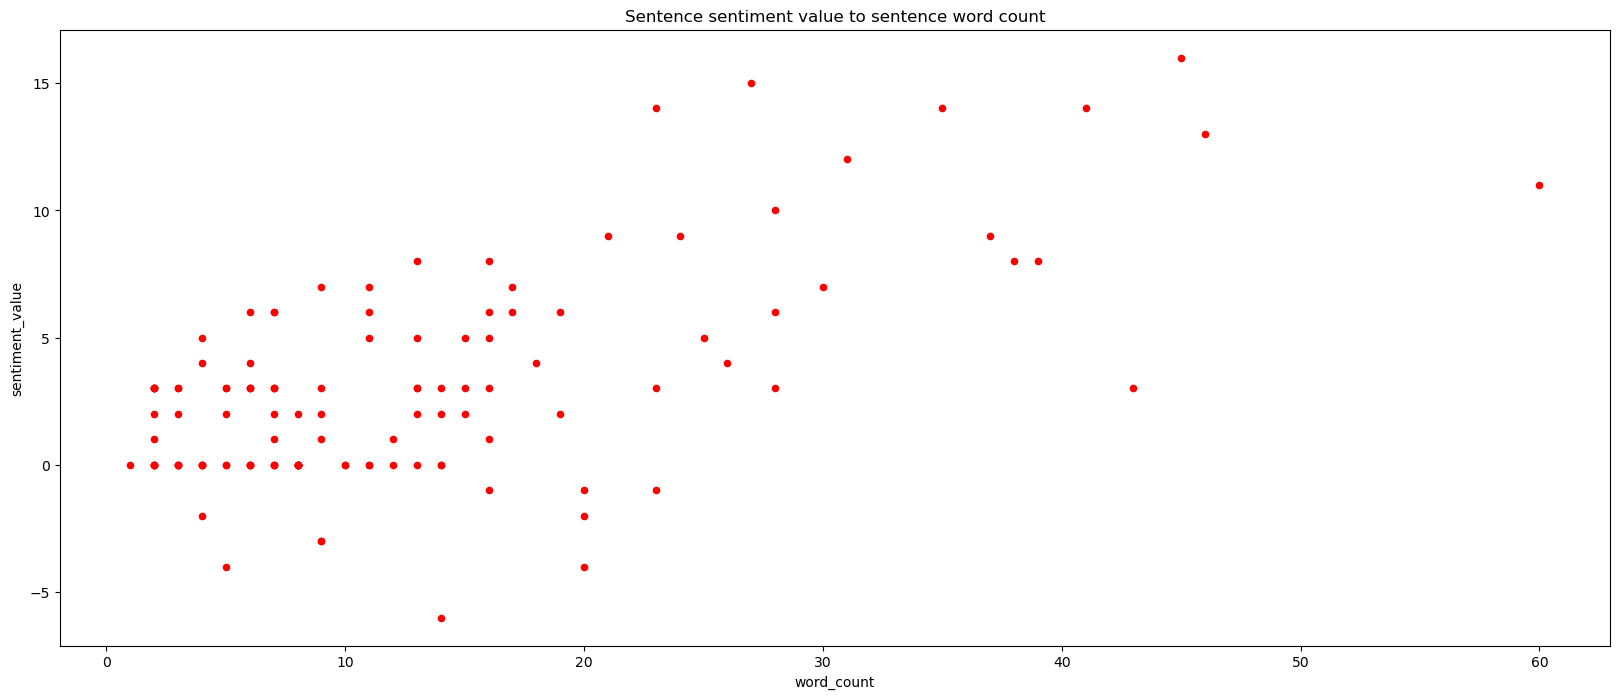

In [57]:
# Correlation analysis
sent_df.plot.scatter(x= 'word_count',y= 'sentiment_value',figsize=(20,8),title= 'Sentence sentiment value to sentence word count',color='red')

In [ ]:
# the word_count between 0-30 has low sentiment value and the density is also high